# Lesson 3 Module 3: Asymptotic Efficiency & Cramér–Rao Lower Bound

This notebook demonstrates Fisher information and the Cramér–Rao lower bound using practical examples.
It extends Lesson 2 (Fisher information, MLE) and provides foundation for confidence intervals.

## Learning Objectives
- Define score function, Fisher information, and CRLB for unbiased estimators
- State regularity conditions and equality cases
- Explain asymptotic normality of MLEs and asymptotic efficiency
- Work through Normal, Poisson, and Exponential examples (Lesson 2)

## Repository Context
- Uses `fisher_info_*` functions from the appendix
- Extends Lesson 2 MLE properties and Fisher information concepts
- Demonstrates efficiency of Lesson 2 estimators

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style and random seed
sns.set_theme(context="talk", style="whitegrid")
sns.set_palette(["#000000", "#E69F00", "#56B4E9", "#009E73",
                 "#F0E442", "#0072B2", "#D55E00", "#CC79A7"])
rng = np.random.default_rng(2025)

print("Environment setup complete. Random seed: 2025")

Environment setup complete. Random seed: 2025


## 1. Fisher Information Functions

Using the functions from the appendix to compute Fisher information for common distributions.

In [2]:
# Fisher information functions (from appendix)
def fisher_info_normal_mean(sigma):
    """Per-observation Fisher information for μ in Normal(μ, σ²) with σ known."""
    return 1.0 / (sigma**2)

def fisher_info_poisson(lam):
    """Per-observation Fisher information for λ in Poisson(λ)."""
    return 1.0 / lam

def fisher_info_exponential(lam):
    """Per-observation Fisher information for λ in Exponential(rate=λ)."""
    return 1.0 / (lam**2)

print("Fisher information functions defined")

Fisher information functions defined


In [3]:
# Demonstrate Fisher information for different parameters
sigma_values = np.array([0.5, 1.0, 2.0, 5.0])
lambda_values = np.array([0.5, 1.0, 2.0, 5.0])

print("Fisher Information Comparison:")
print("σ\tI_N(μ) = 1/σ²")
for sigma in sigma_values:
    print(f"{sigma}\t{fisher_info_normal_mean(sigma):.3f}")

print("\nλ\tI_P(λ) = 1/λ")
for lam in lambda_values:
    print(f"{lam}\t{fisher_info_poisson(lam):.3f}")

print("\nλ\tI_E(λ) = 1/λ²")
for lam in lambda_values:
    print(f"{lam}\t{fisher_info_exponential(lam):.3f}")

Fisher Information Comparison:
σ	I_N(μ) = 1/σ²
0.5	4.000
1.0	1.000
2.0	0.250
5.0	0.040

λ	I_P(λ) = 1/λ
0.5	2.000
1.0	1.000
2.0	0.500
5.0	0.200

λ	I_E(λ) = 1/λ²
0.5	4.000
1.0	1.000
2.0	0.250
5.0	0.040


## 2. Normal Mean: CRLB Achievement

Demonstrate that the sample mean achieves the CRLB for Normal data.

In [4]:
def simulate_crlb_achievement(true_mu, true_sigma, n_values, R=5000):
    """
    Simulate CRLB achievement for Normal mean estimation.
    """
    results = []

    for n in n_values:
        estimates = np.zeros(R)

        for r in range(R):
            sample = rng.normal(true_mu, true_sigma, n)
            estimates[r] = np.mean(sample)

        empirical_var = np.var(estimates, ddof=0)
        crlb = true_sigma**2 / n
        efficiency_ratio = empirical_var / crlb

        results.append({
            'n': n,
            'empirical_var': empirical_var,
            'crlb': crlb,
            'efficiency_ratio': efficiency_ratio
        })

    return pd.DataFrame(results)

print("Function defined: simulate_crlb_achievement")

Function defined: simulate_crlb_achievement


In [5]:
# Simulate CRLB achievement
true_mu = 10.0
true_sigma = 2.0
n_values = [5, 10, 20, 50, 100, 200]

normal_results = simulate_crlb_achievement(true_mu, true_sigma, n_values, R=10000)
print("Normal mean CRLB achievement:")
print(normal_results.round(6))

Normal mean CRLB achievement:
     n  empirical_var  crlb  efficiency_ratio
0    5       0.790924  0.80          0.988655
1   10       0.412726  0.40          1.031816
2   20       0.203002  0.20          1.015010
3   50       0.079888  0.08          0.998605
4  100       0.040253  0.04          1.006327
5  200       0.020566  0.02          1.028277


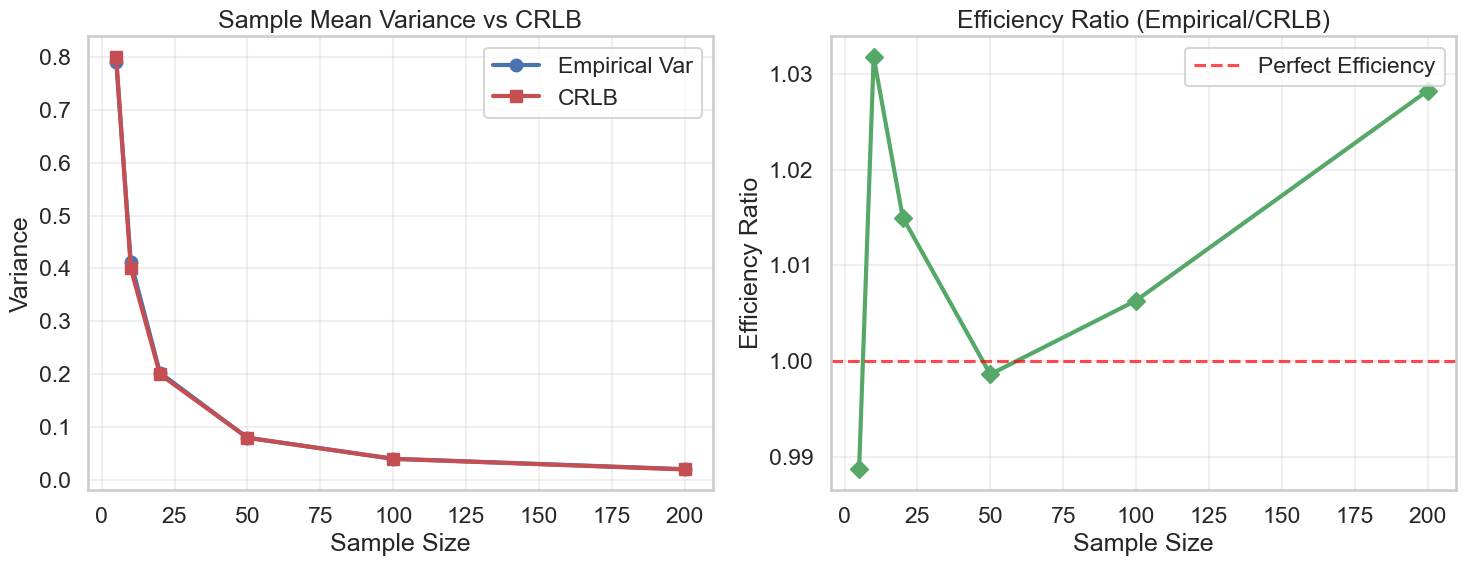

Asymptotic efficiency ratio: 1.0283
Sample mean achieves CRLB asymptotically


In [7]:
# Plot CRLB achievement
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Variance comparison
axes[0].plot(normal_results['n'], normal_results['empirical_var'], 'b-', linewidth=3, marker='o', label='Empirical Var')
axes[0].plot(normal_results['n'], normal_results['crlb'], 'r-', linewidth=3, marker='s', label='CRLB')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Variance')
axes[0].set_title('Sample Mean Variance vs CRLB')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Efficiency ratio
axes[1].plot(normal_results['n'], normal_results['efficiency_ratio'], 'g-', linewidth=3, marker='D')
axes[1].axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Perfect Efficiency')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Efficiency Ratio')
axes[1].set_title('Efficiency Ratio (Empirical/CRLB)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/normal_crlb_achievement.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Asymptotic efficiency ratio: {normal_results.iloc[-1]['efficiency_ratio']:.4f}")
print("Sample mean achieves CRLB asymptotically")

## 3. Poisson Rate: MLE Efficiency

Demonstrate CRLB achievement for Poisson MLE.

In [9]:
def simulate_poisson_efficiency(true_lambda, n_values, R=5000):
    """
    Simulate CRLB achievement for Poisson rate estimation.
    """
    results = []

    for n in n_values:
        estimates = np.zeros(R)

        for r in range(R):
            sample = rng.poisson(true_lambda, n)
            estimates[r] = np.mean(sample)  # MLE for Poisson

        empirical_var = np.var(estimates, ddof=0)
        crlb = true_lambda / n
        efficiency_ratio = empirical_var / crlb

        results.append({
            'n': n,
            'empirical_var': empirical_var,
            'crlb': crlb,
            'efficiency_ratio': efficiency_ratio
        })

    return pd.DataFrame(results)

print("Function defined: simulate_poisson_efficiency")

Function defined: simulate_poisson_efficiency


In [10]:
# Simulate Poisson efficiency
true_lambda = 3.0
poisson_results = simulate_poisson_efficiency(true_lambda, n_values, R=10000)
print("Poisson rate CRLB achievement:")
print(poisson_results.round(6))

Poisson rate CRLB achievement:
     n  empirical_var   crlb  efficiency_ratio
0    5       0.610285  0.600          1.017142
1   10       0.301013  0.300          1.003377
2   20       0.149022  0.150          0.993483
3   50       0.059314  0.060          0.988569
4  100       0.029581  0.030          0.986030
5  200       0.015137  0.015          1.009126


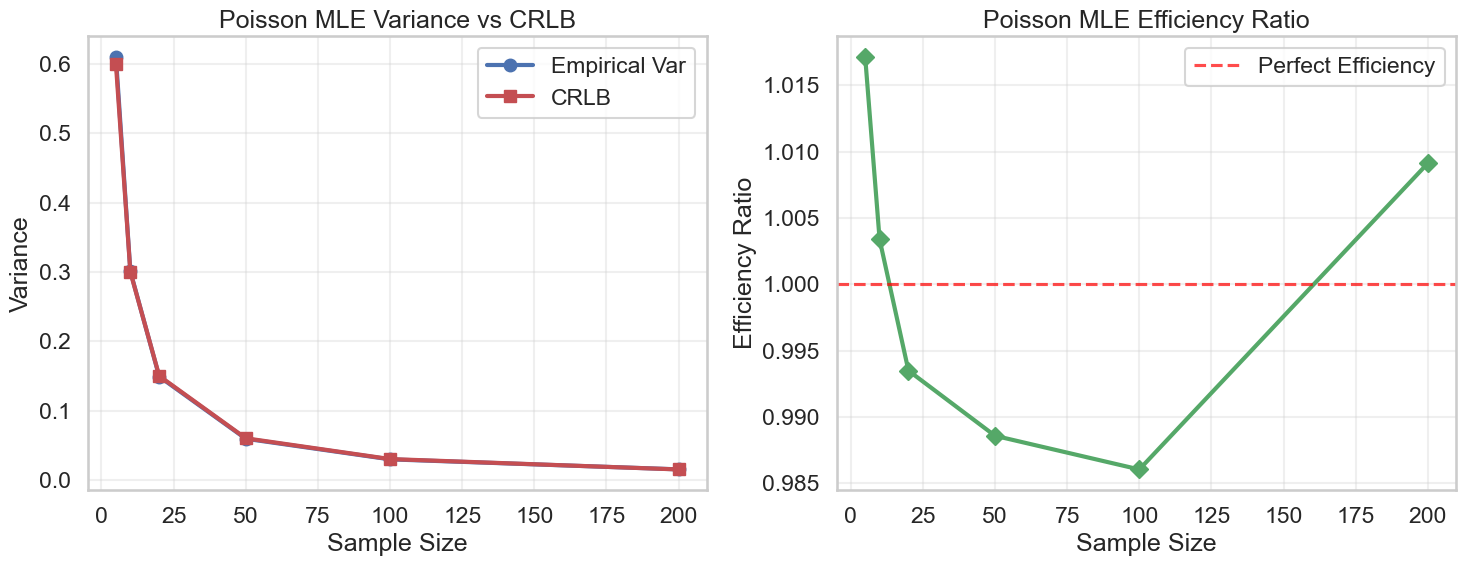

Poisson MLE asymptotic efficiency ratio: 1.0091


In [11]:
# Plot Poisson CRLB achievement
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Variance comparison
axes[0].plot(poisson_results['n'], poisson_results['empirical_var'], 'b-', linewidth=3, marker='o', label='Empirical Var')
axes[0].plot(poisson_results['n'], poisson_results['crlb'], 'r-', linewidth=3, marker='s', label='CRLB')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Variance')
axes[0].set_title('Poisson MLE Variance vs CRLB')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Efficiency ratio
axes[1].plot(poisson_results['n'], poisson_results['efficiency_ratio'], 'g-', linewidth=3, marker='D')
axes[1].axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Perfect Efficiency')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Efficiency Ratio')
axes[1].set_title('Poisson MLE Efficiency Ratio')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/poisson_crlb_achievement.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Poisson MLE asymptotic efficiency ratio: {poisson_results.iloc[-1]['efficiency_ratio']:.4f}")

## 4. Exponential Rate: Asymptotic Efficiency

Compare MLE and unbiased estimators for exponential rate.

In [12]:
def exponential_mle(x):
    """MLE for exponential rate: n / sum(x)"""
    return len(x) / np.sum(x)

def exponential_unbiased(x):
    """Unbiased estimator for exponential rate: (n-1) / sum(x)"""
    n = len(x)
    return (n - 1) / np.sum(x)

def simulate_exponential_efficiency(true_lambda, n_values, R=5000):
    """
    Compare MLE and unbiased estimators for exponential rate.
    """
    results = []

    for n in n_values:
        mle_estimates = np.zeros(R)
        unbiased_estimates = np.zeros(R)

        for r in range(R):
            # Generate exponential with rate lambda (scale = 1/lambda)
            sample = rng.exponential(1/true_lambda, n)
            mle_estimates[r] = exponential_mle(sample)
            unbiased_estimates[r] = exponential_unbiased(sample)

        # MLE properties
        mle_var = np.var(mle_estimates, ddof=0)
        mle_bias = np.mean(mle_estimates) - true_lambda
        mle_mse = np.mean((mle_estimates - true_lambda)**2)

        # Unbiased properties
        unbiased_var = np.var(unbiased_estimates, ddof=0)
        unbiased_bias = np.mean(unbiased_estimates) - true_lambda
        unbiased_mse = np.mean((unbiased_estimates - true_lambda)**2)

        # CRLB
        crlb = true_lambda**2 / n

        results.append({
            'n': n,
            'mle_var': mle_var,
            'mle_bias': mle_bias,
            'mle_mse': mle_mse,
            'unbiased_var': unbiased_var,
            'unbiased_bias': unbiased_bias,
            'unbiased_mse': unbiased_mse,
            'crlb': crlb
        })

    return pd.DataFrame(results)

print("Function defined: simulate_exponential_efficiency")

Function defined: simulate_exponential_efficiency


In [13]:
# Simulate exponential efficiency
true_lambda = 2.0
exp_results = simulate_exponential_efficiency(true_lambda, n_values, R=10000)
print("Exponential rate estimator comparison:")
print(exp_results.round(6))

Exponential rate estimator comparison:
     n   mle_var  mle_bias   mle_mse  unbiased_var  unbiased_bias  \
0    5  1.937547  0.490732  2.178365      1.240030      -0.007414   
1   10  0.622905  0.234009  0.677665      0.504553       0.010608   
2   20  0.249268  0.103734  0.260028      0.224964      -0.001453   
3   50  0.085399  0.040953  0.087076      0.082017       0.000134   
4  100  0.042377  0.021858  0.042854      0.041533       0.001639   
5  200  0.020605  0.008818  0.020682      0.020399      -0.001226   

   unbiased_mse  crlb  
0      1.240085  0.80  
1      0.504665  0.40  
2      0.224966  0.20  
3      0.082017  0.08  
4      0.041536  0.04  
5      0.020401  0.02  


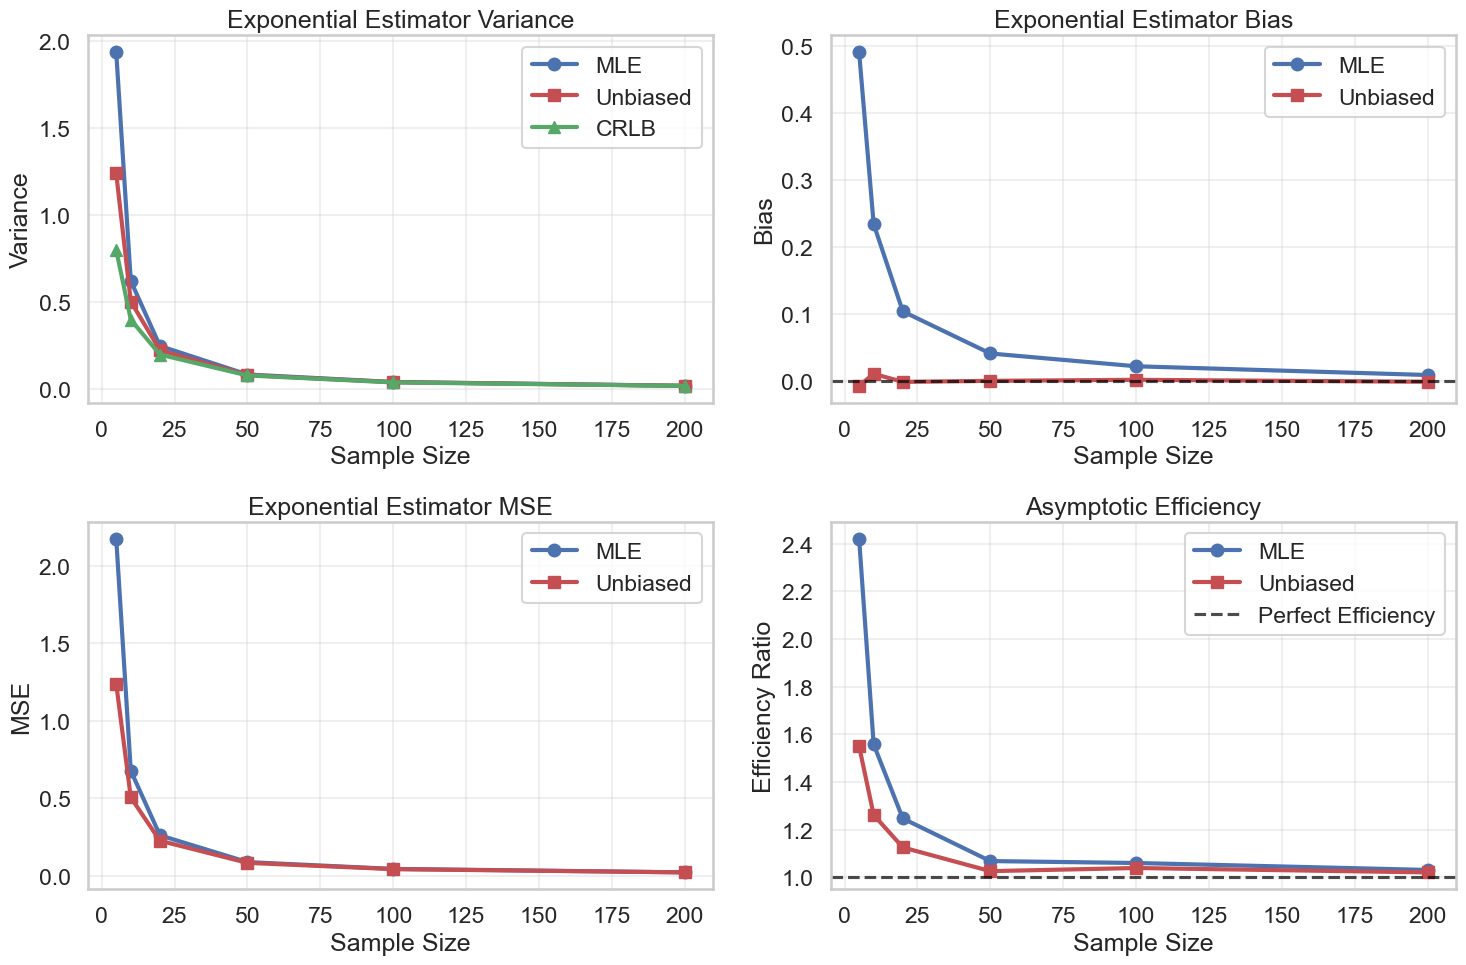

MLE asymptotic efficiency ratio: 1.0302
Unbiased asymptotic efficiency ratio: 1.0200
MLE achieves CRLB asymptotically but has finite-sample bias


In [14]:
# Plot exponential comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Variance comparison
axes[0,0].plot(exp_results['n'], exp_results['mle_var'], 'b-', linewidth=3, marker='o', label='MLE')
axes[0,0].plot(exp_results['n'], exp_results['unbiased_var'], 'r-', linewidth=3, marker='s', label='Unbiased')
axes[0,0].plot(exp_results['n'], exp_results['crlb'], 'g-', linewidth=3, marker='^', label='CRLB')
axes[0,0].set_xlabel('Sample Size')
axes[0,0].set_ylabel('Variance')
axes[0,0].set_title('Exponential Estimator Variance')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Bias comparison
axes[0,1].plot(exp_results['n'], exp_results['mle_bias'], 'b-', linewidth=3, marker='o', label='MLE')
axes[0,1].plot(exp_results['n'], exp_results['unbiased_bias'], 'r-', linewidth=3, marker='s', label='Unbiased')
axes[0,1].axhline(0, color='black', linestyle='--', alpha=0.7)
axes[0,1].set_xlabel('Sample Size')
axes[0,1].set_ylabel('Bias')
axes[0,1].set_title('Exponential Estimator Bias')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# MSE comparison
axes[1,0].plot(exp_results['n'], exp_results['mle_mse'], 'b-', linewidth=3, marker='o', label='MLE')
axes[1,0].plot(exp_results['n'], exp_results['unbiased_mse'], 'r-', linewidth=3, marker='s', label='Unbiased')
axes[1,0].set_xlabel('Sample Size')
axes[1,0].set_ylabel('MSE')
axes[1,0].set_title('Exponential Estimator MSE')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Efficiency ratios
mle_efficiency = exp_results['mle_var'] / exp_results['crlb']
unbiased_efficiency = exp_results['unbiased_var'] / exp_results['crlb']

axes[1,1].plot(exp_results['n'], mle_efficiency, 'b-', linewidth=3, marker='o', label='MLE')
axes[1,1].plot(exp_results['n'], unbiased_efficiency, 'r-', linewidth=3, marker='s', label='Unbiased')
axes[1,1].axhline(1.0, color='black', linestyle='--', alpha=0.7, label='Perfect Efficiency')
axes[1,1].set_xlabel('Sample Size')
axes[1,1].set_ylabel('Efficiency Ratio')
axes[1,1].set_title('Asymptotic Efficiency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/exponential_efficiency.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"MLE asymptotic efficiency ratio: {mle_efficiency.iloc[-1]:.4f}")
print(f"Unbiased asymptotic efficiency ratio: {unbiased_efficiency.iloc[-1]:.4f}")
print("MLE achieves CRLB asymptotically but has finite-sample bias")

## 5. Summary and Key Takeaways

This notebook demonstrated:
1. Fisher information quantifies the information content of data
2. CRLB sets theoretical minimum variance for unbiased estimators
3. Sample mean achieves CRLB for Normal and Poisson models
4. MLE achieves CRLB asymptotically for exponential rate
5. Tradeoffs between bias and efficiency in finite samples

Key insights:
- Fisher information I(θ) = Var(U(θ)) measures precision
- CRLB = 1/I_n(θ) is the theoretical efficiency bound
- MLEs achieve CRLB asymptotically under regularity conditions
- Lesson 2 estimators are asymptotically efficient
- Finite-sample properties may differ from asymptotic behavior